##Un-Supervised Learning Algorithms - K-Means Clustering: 
Build a K-Means Model for the given dataset. Build a K-Means Model for the given Dataset. Use the Elbow or Silhouette method to find the best possible K-value. Use the cost function as WCSS(Within Cluster Sum of Squares). Curate a new data point and find which cluster it goes to. Write the inference. 

In [1]:
import numpy as np

In [2]:
from scipy.spatial.distance import cdist


In [20]:
class KMeans:
    def __init__(self,k,max_iterations=100):
        self.k=k;
        self.max_iterations=max_iterations
    def fit(self,x):
        self.centroids=x[np.random.choice(x.shape[0],self.k, replace=False),:]
        for i in range(self.max_iterations):
            #Assigning the clusters to points
            dist=cdist(x,self.centroids)
            clustr_lab=np.argmin(dist,axis=1)
            
            #Updating the centroids
            for j in range(self.k):
                mask=clustr_lab==j
                if(np.sum(mask)>0):
                    self.centroids[j,:]=np.mean(x[mask,:],axis=0)
    def predict(self,x):
        dist=cdist(x,self.centroids)
        clustr_lab=np.argmin(dist,axis=1)
        return clustr_lab
            

In [21]:
from sklearn.datasets import make_blobs
x,y=make_blobs(n_samples=100,centers=3,n_features=2,random_state=42)
kmeans=KMeans(k=3)
kmeans.fit(x)

In [22]:
labels=kmeans.predict(x)

In [23]:
labels

array([2, 0, 1, 0, 2, 0, 1, 0, 0, 1, 1, 2, 2, 1, 1, 2, 2, 1, 2, 2, 1, 2,
       2, 1, 1, 1, 0, 2, 2, 2, 2, 0, 0, 2, 1, 1, 1, 1, 0, 0, 2, 1, 0, 1,
       1, 0, 2, 2, 2, 0, 0, 0, 1, 2, 2, 2, 1, 1, 0, 1, 2, 0, 2, 0, 2, 2,
       0, 2, 0, 0, 0, 2, 2, 1, 0, 2, 0, 2, 0, 0, 1, 0, 1, 2, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 2, 1], dtype=int64)

In [24]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

def elbow(x):
    wcss=[]
    for i in range(1,11):
        kmeans=KMeans(i)
        kmeans.fit(x)
        wcss.append(kmeans.inertia_)
    plt.plot(range(1, 11), wcss)
    plt.title('Elbow Method')
    plt.xlabel('Number of Clusters')
    plt.ylabel('WCSS')
    plt.show()

C:\ANACONDA\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


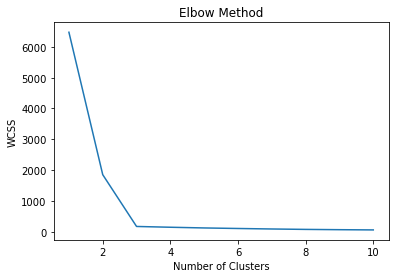

In [25]:
elbow(x)

In [26]:
from sklearn import metrics
def silhouette(X):
    silhouette_scores = []
    for i in range(2, 11):
        kmeans = KMeans(n_clusters=i)
        kmeans.fit(X)
        labels = kmeans.predict(X)
        silhouette_scores.append(metrics.silhouette_score(X, labels, metric='euclidean'))
    plt.plot(range(2, 11), silhouette_scores)
    plt.title('Silhouette Method')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.show()

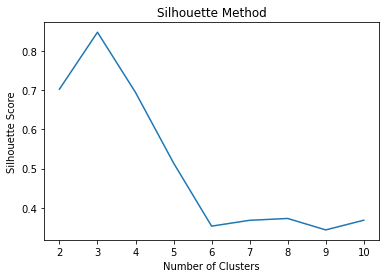

In [27]:
silhouette(x)